<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.248573,99.079920,96.811641,0.001622,256.141756,256.141015,0.000742
1,0.0,1.0,39.369962,27.125956,26.085393,0.001104,102.582415,102.579165,0.003250
2,0.0,2.0,60.015582,47.462801,26.627620,0.002064,144.108067,144.104784,0.003282
3,0.0,3.0,60.185199,43.372523,22.005970,-0.012045,135.551648,135.562306,-0.010658
4,0.0,4.0,63.254878,43.379839,81.074642,0.003252,197.712611,197.708178,0.004432
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.829894,33.736575,20.327001,0.006140,119.899610,119.892673,0.006937
249996,999.0,246.0,27.077073,71.616059,46.338178,0.000866,155.032175,155.030390,0.001785
249997,999.0,247.0,44.052168,98.727864,29.609217,0.000258,182.389507,182.387955,0.001551
249998,999.0,248.0,63.461570,84.150427,41.673029,0.002341,199.287366,199.284407,0.002959


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.248573,99.079920,96.811641,0.001622,256.141756,256.141015,0.000742
1,0.0,1.0,39.369962,27.125956,26.085393,0.001104,102.582415,102.579165,0.003250
2,0.0,2.0,60.015582,47.462801,26.627620,0.002064,144.108067,144.104784,0.003282
3,0.0,3.0,60.185199,43.372523,22.005970,-0.012045,135.551648,135.562306,-0.010658
4,0.0,4.0,63.254878,43.379839,81.074642,0.003252,197.712611,197.708178,0.004432
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.829894,33.736575,20.327001,0.006140,119.899610,119.892673,0.006937
249996,999.0,246.0,27.077073,71.616059,46.338178,0.000866,155.032175,155.030390,0.001785
249997,999.0,247.0,44.052168,98.727864,29.609217,0.000258,182.389507,182.387955,0.001551
249998,999.0,248.0,63.461570,84.150427,41.673029,0.002341,199.287366,199.284407,0.002959


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.248573  99.079920  96.811641  ...  256.141756  256.141015  0.000742
      1.0    39.369962  27.125956  26.085393  ...  102.582415  102.579165  0.003250
      2.0    60.015582  47.462801  26.627620  ...  144.108067  144.104784  0.003282
      3.0    60.185199  43.372523  22.005970  ...  135.551648  135.562306 -0.010658
      4.0    63.254878  43.379839  81.074642  ...  197.712611  197.708178  0.004432
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  55.829894  33.736575  20.327001  ...  119.899610  119.892673  0.006937
      246.0  27.077073  71.616059  46.338178  ...  155.032175  155.030390  0.001785
      247.0  44.052168  98.727864  29.609217  ...  182.389507  182.387955  0.001551
      248.0  63.461570  84.150427  41.673029  ...  199.287366  199.284407  0.002959
      249.0  80.202711  52.907338  22.322176  ...  165.433486  165.431657  0.001829

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.248573  99.079920  96.811641  ...  256.141756  256.141015  0.000742
      1.0    39.369962  27.125956  26.085393  ...  102.582415  102.579165  0.003250
      2.0    60.015582  47.462801  26.627620  ...  144.108067  144.104784  0.003282
      3.0    60.185199  43.372523  22.005970  ...  135.551648  135.562306 -0.010658
      4.0    63.254878  43.379839  81.074642  ...  197.712611  197.708178  0.004432
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  55.829894  33.736575  20.327001  ...  119.899610  119.892673  0.006937
      246.0  27.077073  71.616059  46.338178  ...  155.032175  155.030390  0.001785
      247.0  44.052168  98.727864  29.609217  ...  182.389507  182.387955  0.001551
      248.0  63.461570  84.150427  41.673029  ...  199.287366  199.284407  0.002959
      249.0  80.202711  52.907338  22.322176  ...  165.433486  165.431657  0.001829

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,50.248573,99.079920,96.811641,0.001622,256.141756,256.141015,0.000742
1,0.0,1.0,39.369962,27.125956,26.085393,0.001104,102.582415,102.579165,0.003250
2,0.0,2.0,60.015582,47.462801,26.627620,0.002064,144.108067,144.104784,0.003282
3,0.0,3.0,60.185199,43.372523,22.005970,-0.012045,135.551648,135.562306,-0.010658
4,0.0,4.0,63.254878,43.379839,81.074642,0.003252,197.712611,197.708178,0.004432
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,55.829894,33.736575,20.327001,0.006140,119.899610,119.892673,0.006937
249996,999.0,246.0,27.077073,71.616059,46.338178,0.000866,155.032175,155.030390,0.001785
249997,999.0,247.0,44.052168,98.727864,29.609217,0.000258,182.389507,182.387955,0.001551
249998,999.0,248.0,63.461570,84.150427,41.673029,0.002341,199.287366,199.284407,0.002959


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    50.248573  99.079920  96.811641  ...  256.141756  256.141015  0.000742
      1.0    39.369962  27.125956  26.085393  ...  102.582415  102.579165  0.003250
      2.0    60.015582  47.462801  26.627620  ...  144.108067  144.104784  0.003282
      3.0    60.185199  43.372523  22.005970  ...  135.551648  135.562306 -0.010658
      4.0    63.254878  43.379839  81.074642  ...  197.712611  197.708178  0.004432
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  55.829894  33.736575  20.327001  ...  119.899610  119.892673  0.006937
      246.0  27.077073  71.616059  46.338178  ...  155.032175  155.030390  0.001785
      247.0  44.052168  98.727864  29.609217  ...  182.389507  182.387955  0.001551
      248.0  63.461570  84.150427  41.673029  ...  199.287366  199.284407  0.002959
      249.0  80.202711  52.907338  22.322176  ...  165.433486  165.431657  0.001829

[250000 rows x 7 columns]

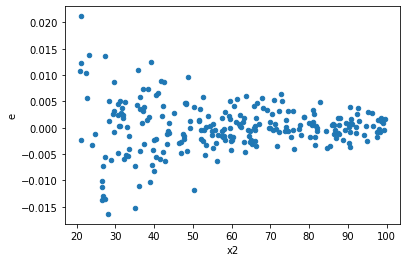

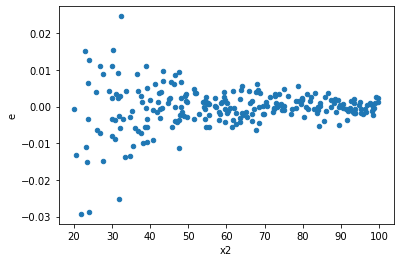

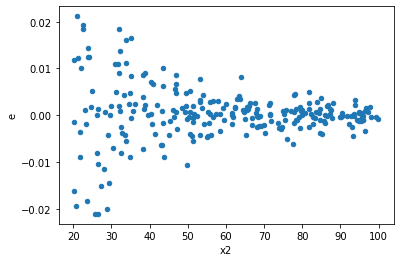

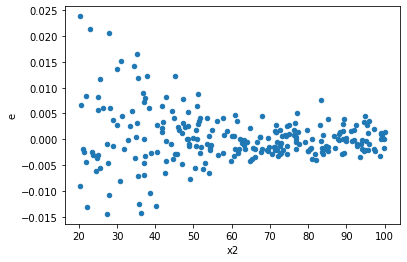

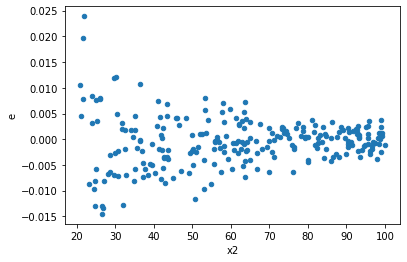

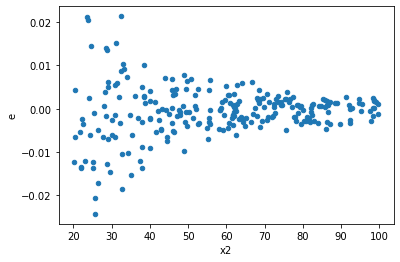

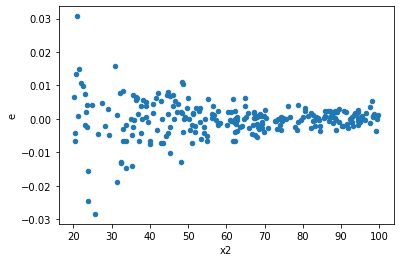

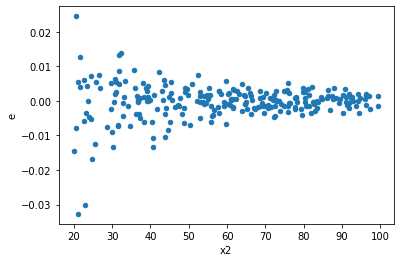

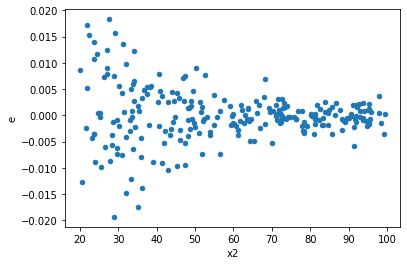

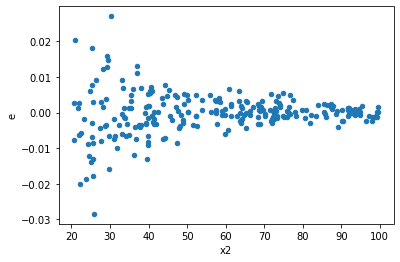

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,0.005759767028149179,0.0004884095046569568,5.9379041527311126e-05,5.035149532545947e-06,0.0847967465124888,5.984317966192444e-28,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,0.005474093975453629,0.0004213531095150082,5.6433958509831225e-05,4.343846489845445e-06,0.07697220972171771,1.0867342933674143e-29,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,0.006960968904218715,0.0005282093358353543,7.176256602287336e-05,5.44545707046757e-06,0.07588158244971206,5.9881973305013254e-30,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,0.004523491326708661,0.0003077472927843937,4.6633931203182075e-05,3.1726525029318938e-06,0.06803313426673768,6.017131968600807e-32,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,0.005348380797977832,0.00039322411525996364,5.513794637090549e-05,4.053856858350141e-06,0.07352208642448153,1.593781808811066e-30,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,0.00676925515091316,0.00038243073753866356,6.978613557642433e-05,3.942584923079006e-06,0.05649524637685941,2.054880670303745e-35,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.008909701427226848,0.0003270093428265459,9.185259203326647e-05,3.371230338417999e-06,0.036702615177120236,1.0183453976122565e-43,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,0.006267531500717064,0.0005124419844775674,6.461372681151612e-05,5.282907056469767e-06,0.08176137358367314,1.3325051523495601e-28,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,0.006462412401051856,0.00031238591062218897,6.662280825826655e-05,3.220473305383391e-06,0.04833890058940581,2.229258410196035e-38,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64